In [1]:
# !pip install git+https://github.com/jupyterhub/binderhub
# !pip install https://github.com/jupyter/repo2docker/archive/master.zip

# ANGULAR SIZE VERSUS Z

In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [2]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
import astropy.constants as cc
import astropy.units as uu

pd_masses = xr.open_dataarray('./data/pd_masses.nc').rename({'dim_0': 'radius', 'dim_1': 'elevation'})
pd_r = pd.read_pickle("./data/pd_r.pkl")
pd_z = pd.read_pickle("./data/pd_z.pkl")
pd_dv0 = pd.read_pickle("./data/pd_dv0.pkl")
redshifts = pd.read_pickle("./data/redshifts.pkl")

def plot_2d_mass(z):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    R_0 = 14.01  # 4D radius of the Universe
    z_0 = redshifts[0][z]  # the initial redshift
    
    # Create the 2D subplot
    ax = plt.subplot(gs[0])
    
    # Create a symmetric X grid by concatenating the negative and positive r values
    r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
    dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)

    
    Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
    Z = np.concatenate((np.flip(pd_masses[z].values/dv0, axis=0), pd_masses[z].values/dv0), axis=0)

    contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
    ax.set_xlabel('X (1000 Lyr)')
    ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
    ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0
    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

z_slider = widgets.IntSlider(min=0, max=49, step=1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_2d_mass, {'z': z_slider})
display(z_slider, interactive_plot)



IntSlider(value=0, continuous_update=False, description='Redshift:', max=49)

Output()

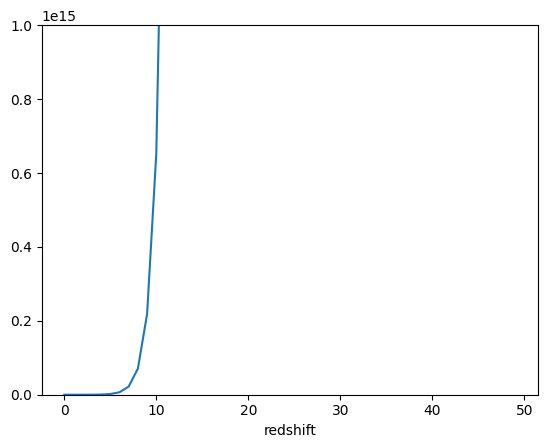

In [4]:
import astropy.constants as cc
import astropy.units as uu
total_mass_per_redshift = pd_masses.sum(dim=['elevation', 'radius'])/cc.M_sun
plt.ylim(0,10E14)
total_mass_per_redshift.plot()